# Testing ESS Maximum Likelihood Toolkit (EMTK) 

## Lorentzian Curve / Cauchy Distribution

Generated 2000 samples using parameters [0.01111111]
Adding flat background of 200.0 points
Lorentzian curve maximum likelihood estimation
2200 data points
[0.0001] as initial guess (kappa)
[0.01199194] solution obtained numerically
That a maximum was found is True via second derivative
0.09994531971522162 0.0010055157018758708 0.0019399961571244264


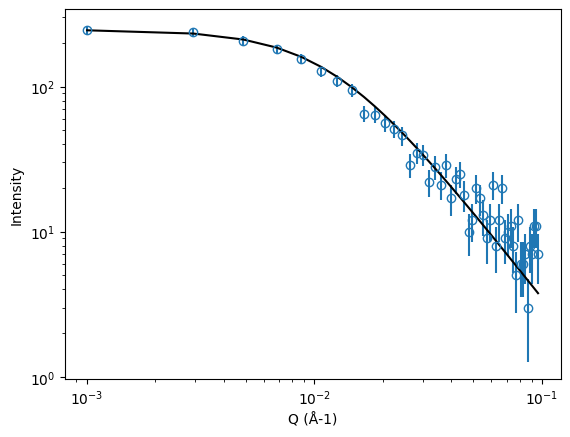

In [1]:
import emtk
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

reload(emtk)

clength = 90.0 # correlation length in system

kappa = 1.0 / clength
curv = emtk.lorentzianCurve()
pvalues = np.array([kappa])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, 2000)
curv.generatebackground(xrange, ratio=0.1) # method is resistant to a 10% background, which is pretty big
curv.mle()
#curv.report()
#curv.mleAnalytic()
curv.report()
curv.plotFit(logarithmic=True)
#a2 = curv.adtest()
#print("Anderson Darling test statistic:", a2)
#ks = curv.kstest()
#print("Kolmogorov Smirnov test statistic:", ks)


In [2]:
reload(emtk)
curv = emtk.lorentzianCurve()
pars =  np.array([1.0/90.0])
qt = curv.Quantile(pars, 0.6)
nqt= curv.nQuantile(pars, 0.6)
print("qt :", qt)
print("nqt:", nqt)



qt : 0.0036102188470322916
nqt: [0.00361022]


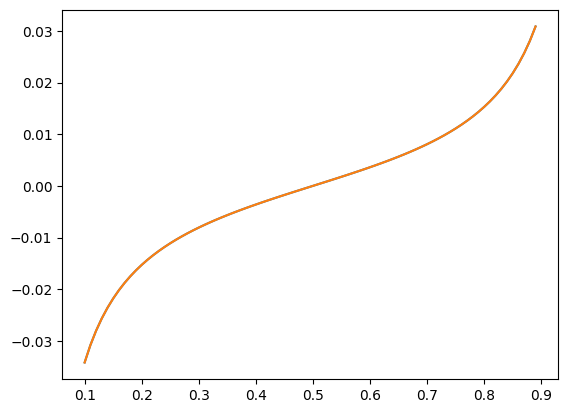

In [3]:
xs = np.arange(0.1, 0.9, 0.01)
ys = curv.Quantile(pars, xs)
nys= curv.nQuantile(pars, xs)
fx,ax = plt.subplots()
ax.plot(xs, ys)
ax.plot(xs, nys)

In [14]:
curv.Quantile(pars, 0.8)

0.015293132449679708

In [15]:
curv.nQuantile(pars, 0.8)

array([0.01529313])

In [16]:
curv.CDF(pars, curv.Quantile(pars, 0.4))

0.4

In [17]:
curv.CDF(pars, curv.nQuantile(pars, 0.4))

array([0.4])

# Lorentzian-Squared

Generated 2000 samples using parameters [0.01111111 0.1       ]


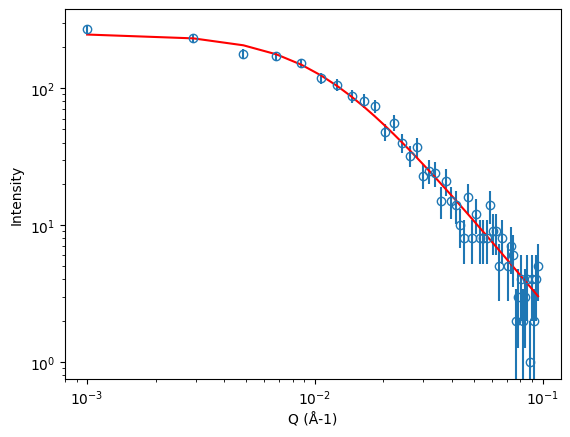

In [4]:
# At present, this is NOT working correctly and needs more development
# It is not clear why this curve shape does not work.
# Suspicion: that the Aharony-Pytte function needs to be replaced
# with an alternative disordered system model.

reload(emtk)
curv = emtk.lorentzianSquaredCurve()
kappa = 1.0 / 90.0
ss = 0.1
pvalues = np.array([kappa, ss])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, 2000)
curv.guesses = pvalues
#curv.mle()
#curv.report()
curv.plotFit(logarithmic=True)

Lorentzian Squared maximum likelihood estimation
2000 data points
[0.01111111 0.1       ] as initial guesses (kappa, S)
[2.63587485e-02 1.62068343e+05] solution obtained numerically
R = 37.93806825974723
That a maximum was found is True via second derivative


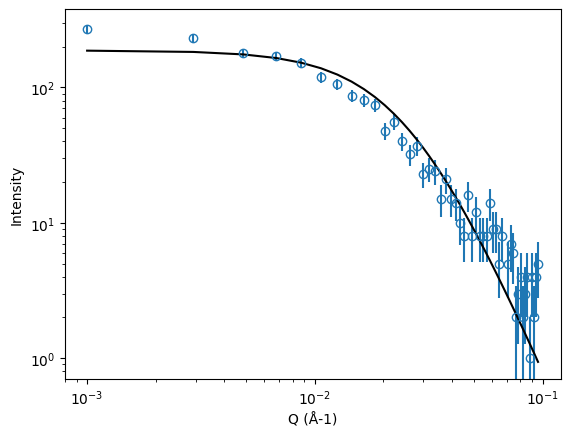

In [5]:
curv.mle()
curv.report()
curv.plotFit()

In [6]:
pars =  np.array([1.0/80.0, 0.1])
xs = np.arange(0.0, 0.1, 0.01)
ys = curv.CDF(pars, xs)
fx,ax = plt.subplots()
ax.plot(xs, ys)

AttributeError: 'lorentzianSquaredCurve' object has no attribute 'CDF'

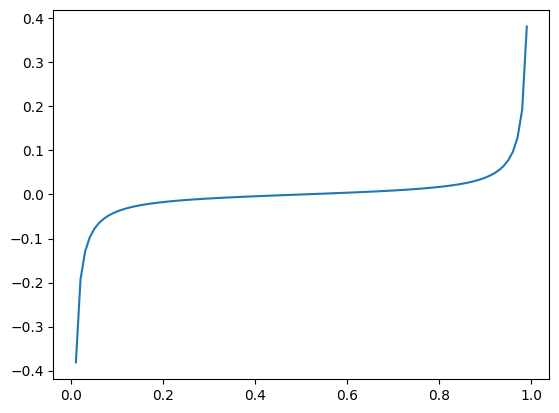

In [20]:
pars =  np.array([1.0/80.0, 0.1])
xs = np.arange(0.01, 1.0, 0.01)
ys = curv.Quantile(pars, xs)
fx,ax = plt.subplots()
ax.plot(xs, ys)

## Hard Spheres

   cdf(x)-p =  0.0032255526111020227
Generated 4000 samples using parameters [75.]
Hard sphere model maximum likelihood estimation
4000 data points
[75.] as initial guesses (R, Angstroms)
[73.87495751] solution obtained numerically
The second derivative indicates that this is a maximum
0.08000777167139918 0.0010022344089422382 0.0015491281816168029


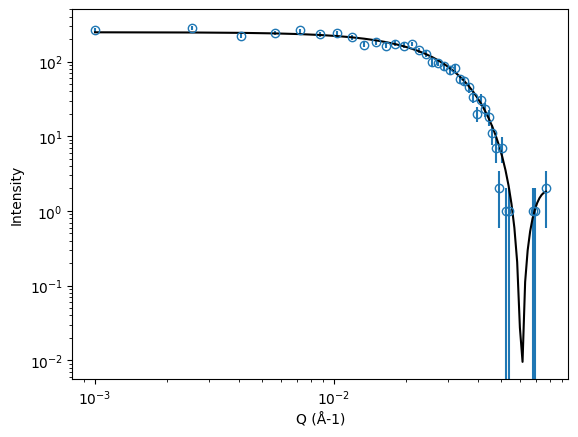

In [57]:
reload(emtk)
curv = emtk.hardSphereCurve()
pvalues = np.array([75.0])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, 4000)
curv.guesses = pvalues
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

Adding flat background of 400.0 points
Hard sphere model maximum likelihood estimation
4400 data points
[75.] as initial guesses (R, Angstroms)
[73.87720583] solution obtained numerically
The second derivative indicates that this is a maximum
0.09983123456067235 0.0010001208713181894 0.0019378649743010618


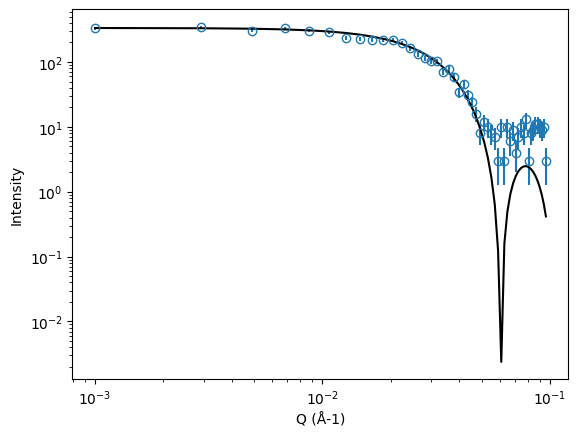

In [58]:
# It is quite tolerant of backgrounds here as well
curv.generatebackground(xrange, ratio=0.1)
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

# Porod Scattering

Generated 4000 samples using parameters [4.e+00 1.e-03]
Calculating best minimal value for power law fit
Generalised Porod curve maximum likelihood estimation
4000 data points
[4.e+00 1.e-03] as initial guesses (z, qmin)
[3.91163437e+00 1.03015149e-03] solution obtained analytically


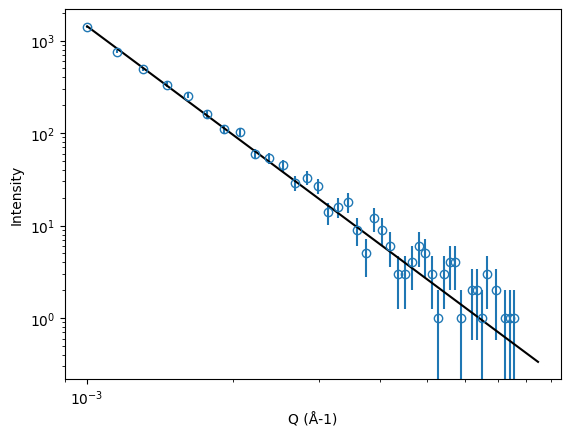

In [69]:
reload(emtk)
curv = emtk.porodCurve()
pvalues = np.array([4.0, 0.001])
xrange = np.array([0.001, 0.01])
curv.generateTestSamples(pvalues, xrange, 4000)
curv.guesses = pvalues
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

Adding flat background of 4.0 points
Calculating best minimal value for power law fit
Generalised Porod curve maximum likelihood estimation
4004 data points
[4.e+00 1.e-03] as initial guesses (z, qmin)
[3.89559772e+00 1.03295321e-03] solution obtained analytically


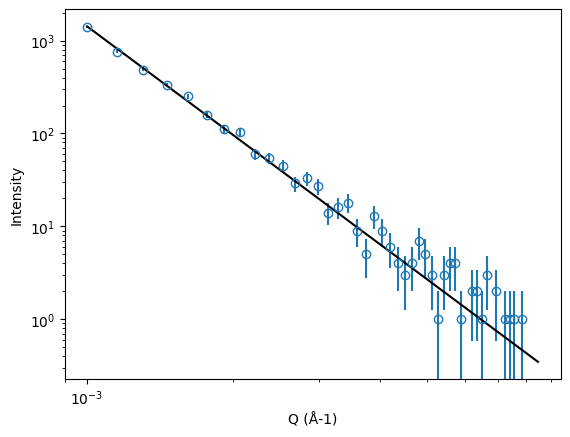

In [70]:
curv.generatebackground(xrange, ratio=1.0E-03)
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

# Missing Features List

In [ ]:
pytest?
testing?
sphinx? - like doxygen

# open data catalogues
data.ill.eu - similar catalogue at ISIS
data.panasc.eu

